In [2]:
import deerlab as dl
from matplotlib import pyplot as plt
import numpy as np

path = '../data/'
fname = '(CuNO_2p5)_40K_(RIDME_5P_Q)detNO_d2_1.5us_Tmix_15us.DTA'

tau1 = 0.4 # us
tau2 = 1.5 # us
d3 = 0.28 # us

# Data loading and adjusting
#============================
t,V = dl.deerload(path+fname)
Vexp = np.real(V) # or via dl.correctphase()
Vexp /= np.max(Vexp)
t += d3 # zero-time correction. The maximum of the pathway 1 must mean t = d1

r = np.arange(1.5, 4, 0.02) # distance axis

Vmodel = dl.dipolarmodel(t, r,  experiment=dl.ex_ridme(tau1, tau2, [1], 0.024), 
                                Bmodel=dl.bg_strexp)

results = dl.fit(Vmodel, Vexp)
print(results)

# Extracting params of interest
#===============================
Vfit = results.model # time-domain fit
Pfit = results.P # distance distribution
Pci95 = results.PUncert.ci(95)
Pci50 = results.PUncert.ci(50)

Bfcn = lambda mod,decay,stretch,reftime: results.P_scale*(1-mod)*dl.bg_strexp(t-reftime,decay,stretch)
Bfit = results.evaluate(Bfcn) # calculating the background [optional]

c:\Users\Sergei\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm-4.65.0-py3.11.egg\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Goodness-of-fit: 
========= ============= ============= ===================== ======= 
 Dataset   Noise level   Reduced 𝛘2    Residual autocorr.    RMSD   
========= ============= ============= ===================== ======= 
   #1         0.003         3.419             1.416          0.005  
========= ============= ============= ===================== ======= 
Model hyperparameters: 
 Regularization parameter  
          0.214            
Model parameters: 
=========== ======= ========================= ====== ====================================== 
 Parameter   Value   95%-Confidence interval   Unit   Description                           
=========== ======= ========================= ====== ====================================== 
 mod         0.294   (0.271,0.318)                    Modulation depth                      
 reftime     0.413   (0.413,0.414)              μs    Refocusing time                       
 decay       0.838   (0.801,0.875)             μs⁻¹   Decay rate         

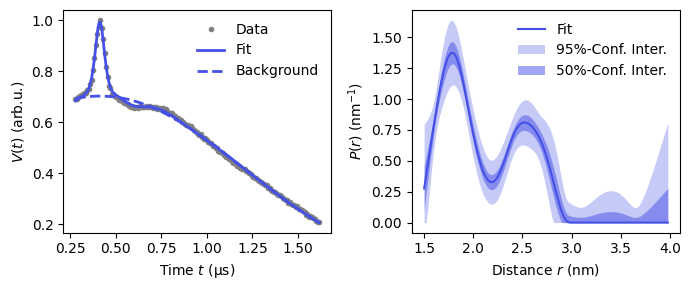

In [3]:
# Plotting
#==========
plt.figure(figsize=[7, 3])
violet = '#4550e6'

# Upper chart for time domain
plt.subplot(121)
plt.plot(t, Vexp, '.', color='grey', label='Data')
plt.plot(t, Vfit, color='#4550e6', linewidth=2, label='Fit')
plt.plot(t, Bfit, '--', color='#4550e6', linewidth=2, label='Background')
plt.legend(frameon=False,loc='best')
plt.xlabel('Time $t$ (μs)')
plt.ylabel('$V(t)$ (arb.u.)')

# Lower chart for distance domain
plt.subplot(122)
plt.plot(r, Pfit, color='#4550e6', label='Fit')
plt.fill_between(r,Pci95[:,0],Pci95[:,1],alpha=0.3,color=violet,label='95%-Conf. Inter.',linewidth=0)
plt.fill_between(r,Pci50[:,0],Pci50[:,1],alpha=0.5,color=violet,label='50%-Conf. Inter.',linewidth=0)
plt.legend(frameon=False,loc='best')
plt.xlabel('Distance $r$ (nm)')
plt.ylabel('$P(r)$ (nm$^{-1}$)')

plt.tight_layout()
plt.show()